# Handwritten digit classification with logistic regression
## Tristan Zippert

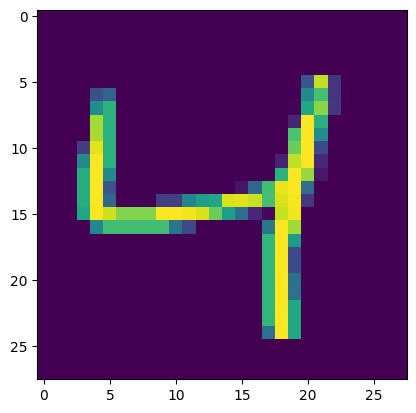

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

mnist_49_3000 = sio.loadmat('mnist_49_3000.mat')

x = mnist_49_3000["x"]
y = mnist_49_3000["y"]

d,n= x.shape
i = 0 #Index of the image to be visualized
plt.imshow( np.reshape(x[:,i], (int(np.sqrt(d)),int(np.sqrt(d)))))
plt.show()

### Dataset label correction
> Note that the labels in the data are ±1, whereas the notes (at times) assume that the labels are 0 and 1.

The original dataset has `-1` assigned to four, and `1` assigned to nine. This line of code corrects it to 0 and 1 labels

In [2]:
y[y<0] = 0

## Dataset showcase

<p>This code snippet showcases the data in `mnist_49_3000.mat`. Specifically, it generates an image that renders the image and the label from the dataset.</p>

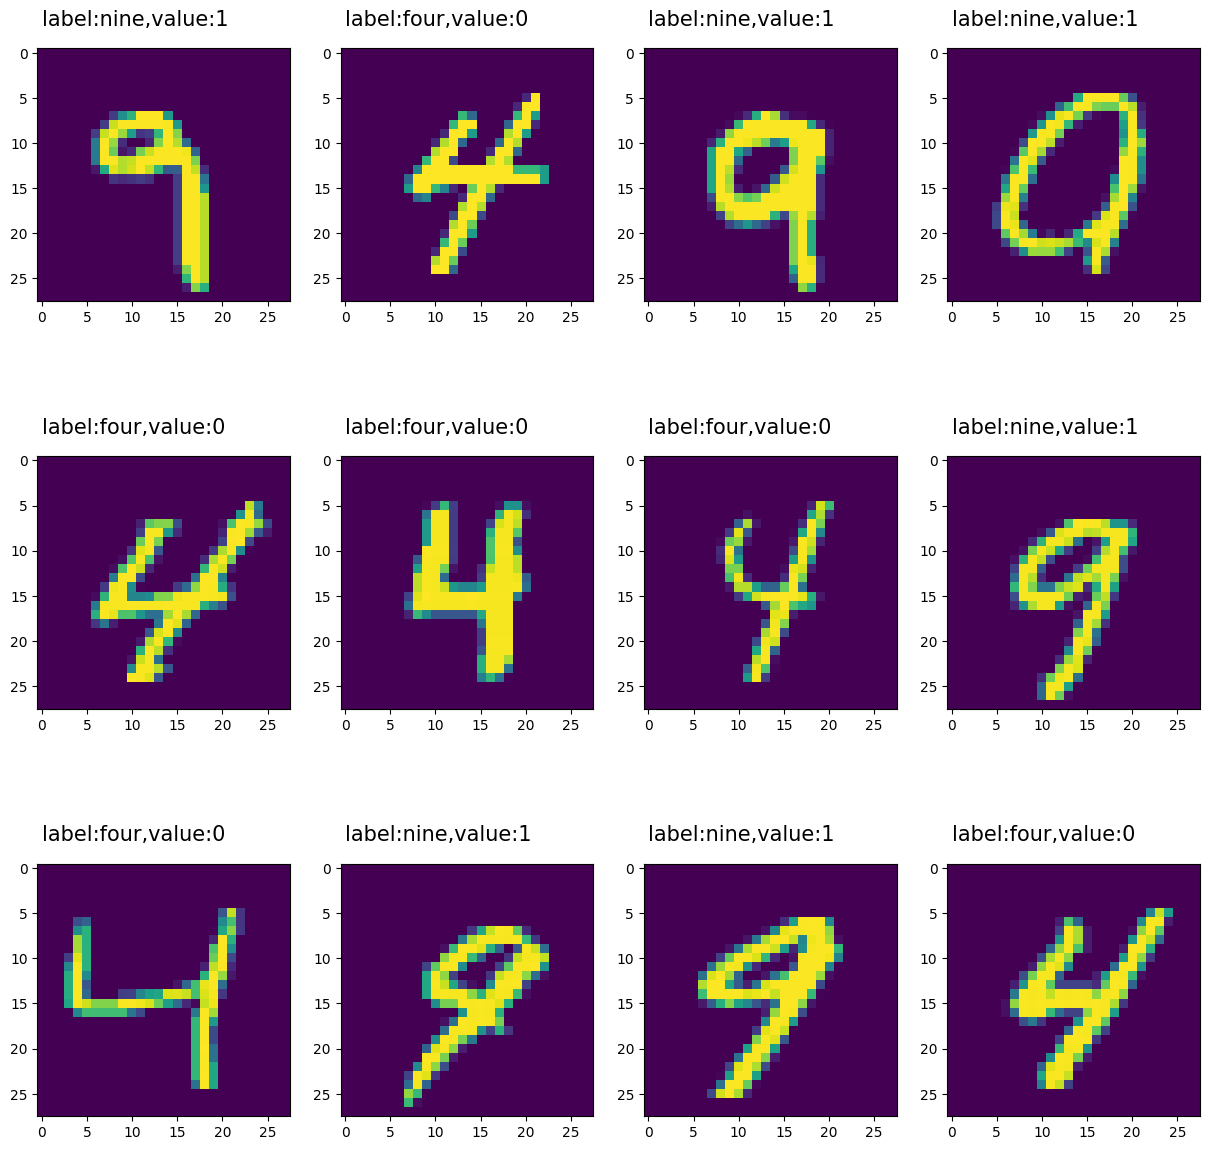

In [3]:
import random
rows=3
cols = 4
img_count = 0
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
for i in range(rows):
    for j in range(cols):        
        if img_count < d:
            val = random.randint(0,d)
            label_val = y[0][val]
            label = "four" if label_val == 0 else "nine"     
            axes[i, j].imshow(np.reshape(x[:,val], (int(np.sqrt(d)),int(np.sqrt(d)))))
            axes[i, j].text(0, -3,f"label:{label},value:{label_val}", fontsize=15)
            img_count+=1

## Dataset splitting
Below is the code to split the dataset patterns and labels into 2000 examples of training data and 1000 as test data. The labels array is indexed by zero first because `y` is returned as a 2D array. 

In [4]:
X_train, X_test = x[:,:2000], x[:,2000:]
y_train, y_test = y[:, :2000],y[:,2000:]

### Bias row
The bias row is added at the beginning of `X_train`.

In [5]:
X_train = np.vstack([np.ones(X_train.shape[1]), X_train])

In [6]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((785, 2000), (784, 1000), (1, 2000), (1, 1000))

## Sigmoid operation for Logistic Regression
### Logistic Regression versus Linear Regression
<div class="math">
\begin{equation}
    \text{Logistic Regression}: \nabla_w E(w) = \Phi^T \left( \sigma(\Phi w) - t \right) \\
    \text{Linear Regression}: \nabla_w E(w) = \Phi^T \left( \Phi w - t \right) \\
\end{equation}
</div>

### Logistic Sigmoid Operation
<div class="math">
\begin{equation}
  \sigma (z) = \frac{1}{1+e^{-z}}\\
   z = w^{T}x\\
   \sigma (w,x) = \frac{1}{1+e^{-w^{T}x}}
\end{equation}
</div>
where `x` is input features and `w` is the parameter vector, and `z` is the linear combination of the input features. 


### Scipy Expit
[Scipy Expit](https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.expit.html) was used in place of the provided Sigmoid function because it is more efficient at calculating negative exponents.

In [7]:
from scipy.special import expit
# def sigmoid(x, w):
#     return 1 / (1 + np.exp(-np.dot(w.T, x)))
def sigmoid(x, w):
    z = np.dot(w.T, x)
    #scipy implementation of 1 / (1 + np.exp(-np.dot(w.T, x))) -- logistic sigmoid operation
    return expit(z)

In [8]:
w = np.zeros((X_train.shape[0], 1))
lambda_ = 10
temp = (y_train-sigmoid(X_train,-w)).T
#computes gradiant of logisitic regression
grad = 2*lambda_*w+np.dot(X_train, temp)
#calculates the predicted probability of each class from X_train set
pred_prob = sigmoid(X_train,-w)
# element wise multiplication with predicted probabilities and the complement
# generates elements that should be on the diagonal 
diag = pred_prob*(1-pred_prob)

In [9]:
n = diag.shape[1]
W = np.zeros((n, n))
#triangular diagonal generation with `diag` elements
np.fill_diagonal(W, diag)
np.fill_diagonal(W[1:], diag[1:])
np.fill_diagonal(W[:, 1:], diag[1:])
W

array([[0.25, 0.  , 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.25, 0.  , ..., 0.  , 0.  , 0.  ],
       [0.  , 0.  , 0.25, ..., 0.  , 0.  , 0.  ],
       ...,
       [0.  , 0.  , 0.  , ..., 0.25, 0.  , 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.25, 0.  ],
       [0.  , 0.  , 0.  , ..., 0.  , 0.  , 0.25]])

In [10]:
xwxt = np.dot(np.dot(X_train, W), X_train.T)
hessian = 2*lambda_*np.identity(w.shape[0])+xwxt
hessian

array([[520.,   0.,   0., ...,   0.,   0.,   0.],
       [  0.,  20.,   0., ...,   0.,   0.,   0.],
       [  0.,   0.,  20., ...,   0.,   0.,   0.],
       ...,
       [  0.,   0.,   0., ...,  20.,   0.,   0.],
       [  0.,   0.,   0., ...,   0.,  20.,   0.],
       [  0.,   0.,   0., ...,   0.,   0.,  20.]])

Matrix Python operand [https://docs.python.org/3/whatsnew/3.5.html#whatsnew-pep-465]

In [11]:
w_new = w - np.linalg.solve(hessian, grad)
w_new

array([[ 2.39338517e-01],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.00000000e+00],
       [ 0.0

In [12]:
w_norm = np.linalg.norm(w_new - w)
w_norm

1.8037619069458235

In [13]:
loss = (y_train - 1)* np.log(sigmoid(w,X_train)).T - y_train* np.log(sigmoid(-w,X_train)).T
loss, loss.shape

(array([[0.69314718, 0.69314718, 0.69314718, ..., 0.69314718, 0.69314718,
         0.69314718]]),
 (1, 2000))

In [14]:
J = np.sum(loss)
J

1386.2943611198907

# Training
From the previous code blocks, we combine it all together for the training loop of 
<div class="math">
\begin{equation}
    \text{Logistic Regression}: \nabla_w E(w) = \Phi^T \left( \sigma(\Phi w) - t \right) \\
    \text{Linear Regression}: \nabla_w E(w) = \Phi^T \left( \Phi w - t \right) \\  
    J(\theta) = −l(\theta) + \lambda∥\theta∥^2 \\ 
    \theta = w^{T}w
\end{equation}
</div>

In [15]:
epochs = 500
hessian = 0
for epoch in range(epochs):
    temp = (y_train-sigmoid(X_train,-w)).T
    # computes gradiant with logistic regression
    grad = 2*(lambda_)*w+np.dot(X_train, temp)
    # calculates the predicted probability of each class from X_train set
    pred_prob = sigmoid(X_train,-w)
    # element wise multiplication with predicted probabilities and the complement
    # generates elements that should be on the diagonal 
    diag = pred_prob*(1-pred_prob)
    
    n = diag.shape[1]
    W = np.zeros((n, n))
    #triangular diagonal generation with `diag` elements
    np.fill_diagonal(W, diag)
    np.fill_diagonal(W[1:], diag[1:])
    np.fill_diagonal(W[:, 1:], diag[1:])
        
    xwxt = np.dot(np.dot(X_train, W), X_train.T)
    hessian = 2*lambda_*np.eye(w.shape[0])+xwxt
    
    delta_w = np.linalg.solve(hessian, grad)
    
    w_new = w - delta_w
    if np.linalg.norm(w)/np.linalg.norm(w-delta_w) < 1:
        loss = (y_train - 1)* np.log(sigmoid(w,X_train)).T - y_train* np.log(sigmoid(-w,X_train)).T
        J = np.sum(loss)
        print(f"converge with objective function:{J}")
    
    w = w_new

converge with objective function:1386.2943611198907
converge with objective function:452.5201158805222
converge with objective function:281.2783806279753
converge with objective function:221.2205878441357
converge with objective function:206.1078079513732
converge with objective function:204.7064651799402
converge with objective function:204.69158189721162
converge with objective function:204.6915799134946
converge with objective function:204.69157991349456
converge with objective function:204.6915799134946
converge with objective function:204.69157991349456
converge with objective function:204.69157991349456
converge with objective function:204.69157991349456
converge with objective function:204.6915799134946
converge with objective function:204.69157991349456
converge with objective function:204.69157991349456
converge with objective function:204.6915799134946
converge with objective function:204.69157991349456
converge with objective function:204.6915799134946
converge with objectiv

converge with objective function:204.69157991349456
converge with objective function:204.69157991349456
converge with objective function:204.69157991349456
converge with objective function:204.69157991349456
converge with objective function:204.6915799134946
converge with objective function:204.69157991349456
converge with objective function:204.6915799134946
converge with objective function:204.69157991349456


### Comparing to baseline


In [16]:
x_test_with_bias = np.vstack((np.ones((1, X_test.shape[1])), X_test))

predict = sigmoid(x_test_with_bias, -w)
#array with all ones
compare = np.ones(predict.shape)

compare[predict < 0.5] = 0

## Testing calculation


In [17]:
#test error calculation
testing_error = (1 - np.count_nonzero(y_test == compare) / y_test.shape[1])
print(f"Error:{testing_error}; {testing_error*100}%")
accuracy = 1-testing_error
print(f"Accuracy:{accuracy}; {accuracy*100}%")

Error:0.04800000000000004; 4.800000000000004%
Accuracy:0.952; 95.19999999999999%


In [18]:
error_list = np.where(y_test != compare)
error_list

(array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0]),
 array([ 35, 119, 179, 191, 202, 221, 249, 278, 300, 322, 334, 344, 362,
        384, 399, 432, 439, 441, 452, 462, 468, 509, 531, 545, 574, 577,
        655, 680, 699, 709, 741, 755, 758, 799, 801, 811, 825, 854, 859,
        882, 886, 889, 891, 893, 917, 927, 942, 982]))

In [19]:
abs_diff = np.abs(predict[error_list] - 0.5)

indices = np.argsort(abs_diff)[20:]

error_top_labels = []
for e in indices:
    error_top_labels.append(y_test[0][e])
error_top_labels

[0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1]

### Misclassified Images
Figure generation showcasing 20 misclassified images from Logistic regression. 

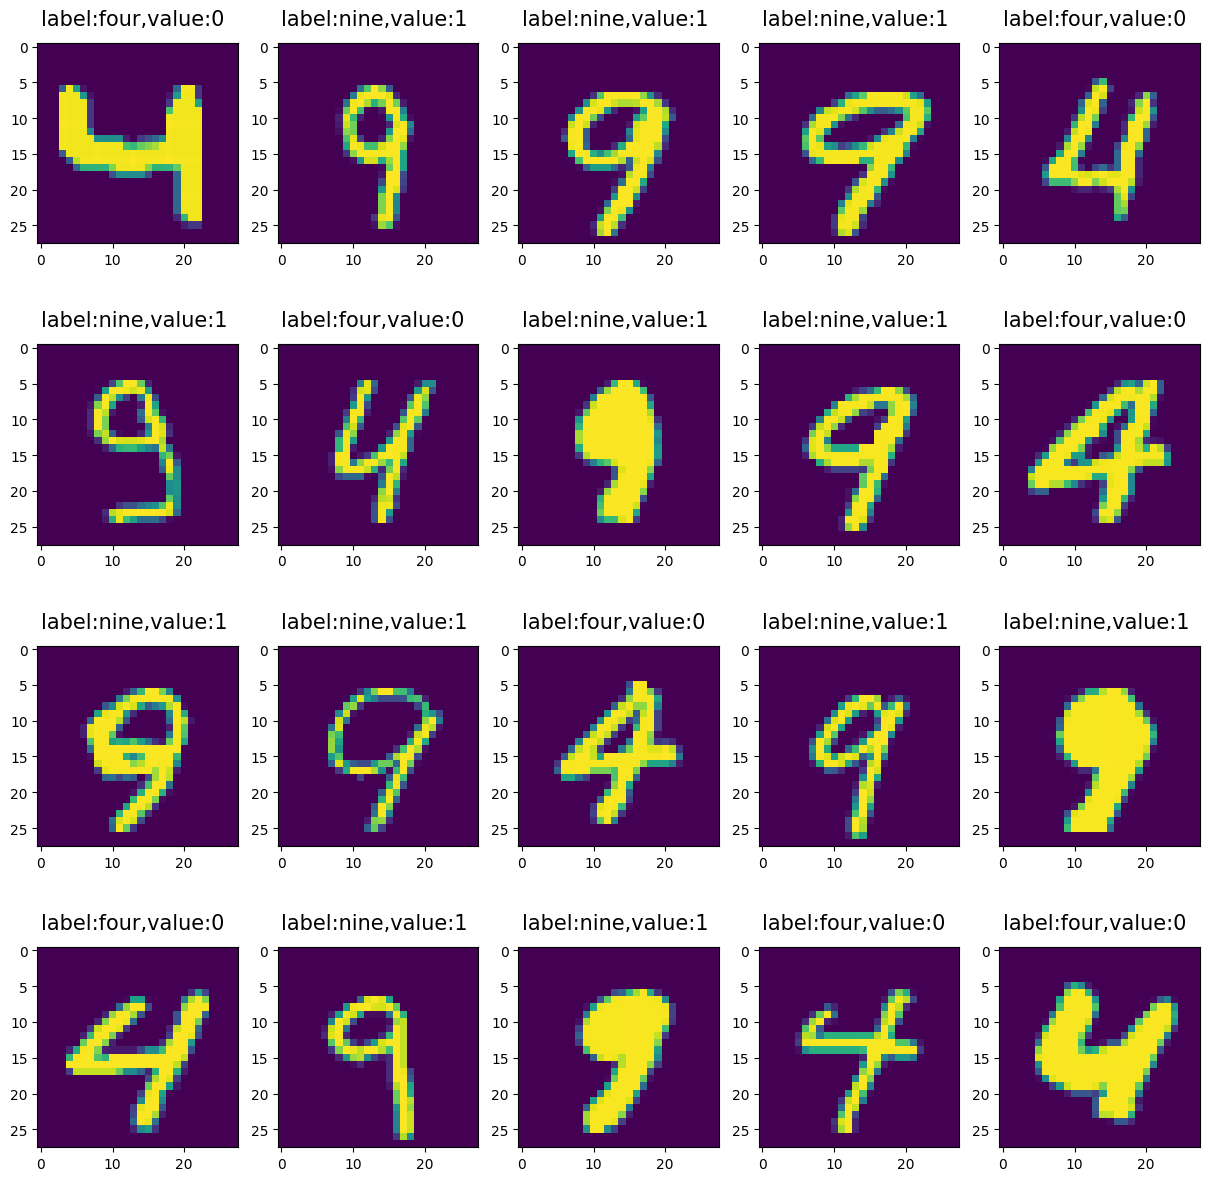

In [20]:
rows=4
cols = 5
img_count = 0
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(15,15))
for i in range(rows):
    for j in range(cols):        
        if img_count < 20:
            val = indices[img_count]
            label_val = error_top_labels[img_count]
            label = "four" if label_val == 0 else "nine"     
            axes[i, j].imshow(np.reshape(X_test[:,val], (int(np.sqrt(d)),int(np.sqrt(d)))))
            axes[i, j].text(0, -3,f"label:{label},value:{label_val}", fontsize=15)
            img_count+=1